
---
# BIGGEST STRIDES REDUCING CO2
---


```
*#(PART 2/3 OF MAIN REPORT_CO2_EMISSIONS)*
```




green.png


> In order to see which countries are making the biggest strides in decreasing their CO2 output. First I calculated the relative Co2 output for each country for 1993 and 2021. The next step is calculating the percentage of change between the two years. To take growing and shrinking populations into account, I will be using CO2 emissions per capita for calculations. The Co2 data used in this analysis is sourced from the "Our World In Data" website

*for more explaination and details see: `REFERENCES`*







---


# Reading In Data

---



In [ ]:
#Importing the usual things and reading in the dataframe.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext google.colab.data_table
pd.options.display.float_format = '{:.2%}'.format
get_owid_col=['country', 'year', 'iso_code','co2_per_capita']

df = pd.read_csv('https://raw.githubusercontent.com/DASH-OF-GLITTER/CO2_Emissions_Report/main/owid-co2-data.csv', usecols=get_owid_col)

df_two_years = df.loc[(df["year"] == 1993) | (df["year"] == 2021)]
df_two_years = df_two_years.dropna(subset = ['iso_code'])
df_two_years = df_two_years.drop(columns=['iso_code'])

#display(df_two_years)

df_two_years_wide = df_two_years.pivot(index='country', columns='year', values='co2_per_capita')
#display(df_two_years_wide)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table




---


# Creating Columns - Calculating Percentage Of Change - Reshaping

---



In [ ]:
df_two_years_wide.dropna(inplace=True)
#Creating new column with percentage of change since 1993 to 2021.
df_two_years_wide['2021vs1993ch'] = ((df_two_years_wide.loc[:,2021] - df_two_years_wide.loc[:,1993]) / df_two_years_wide.loc[:,1993])

#Sorting countries to see who is making the biggest strides
df_biggest_strides = df_two_years_wide.sort_values(by='2021vs1993ch', ascending=True).head(10)
df_biggest_strides['2021vs1993ch'] = df_biggest_strides['2021vs1993ch'].map('{:.2%}'.format)

#display(df_biggest_strides)

#Reshaping data for use in chart B
reshape_biggest_strides = df_biggest_strides.T
reshape_biggest_strides.reset_index(inplace=True)
reshape_biggest_strides.rename(columns={'Democratic Republic of Congo': 'Congo Kinshasa'},inplace=True)
reshape_biggest_strides

country,year,Curacao,French Guiana,Singapore,Somalia,Syria,Congo Kinshasa,Luxembourg,Malta,Nauru,Denmark
0,1993,3164.50%,682.80%,1489.50%,9.70%,334.10%,6.70%,3114.30%,764.90%,1108.20%,1167.50%
1,2021,968.60%,219.00%,547.20%,3.60%,126.60%,2.70%,1306.80%,327.30%,475.60%,505.20%
2,2021vs1993ch,-69.39%,-67.93%,-63.26%,-62.89%,-62.11%,-59.70%,-58.04%,-57.21%,-57.08%,-56.73%




---


# Creating Horizontal Bar Chart

---




---

# **> CHART B**

---
Below in chart B are the top ten countries that have made the biggest strides decreasing their CO2 emissions. The percentage of change is measured between 1993 and 2021.

*`The blue portion of the graph is purposely enlarged to represent the countries Somalia and Congo Kinshasa,`*

*`small emitters but big reducers. `*

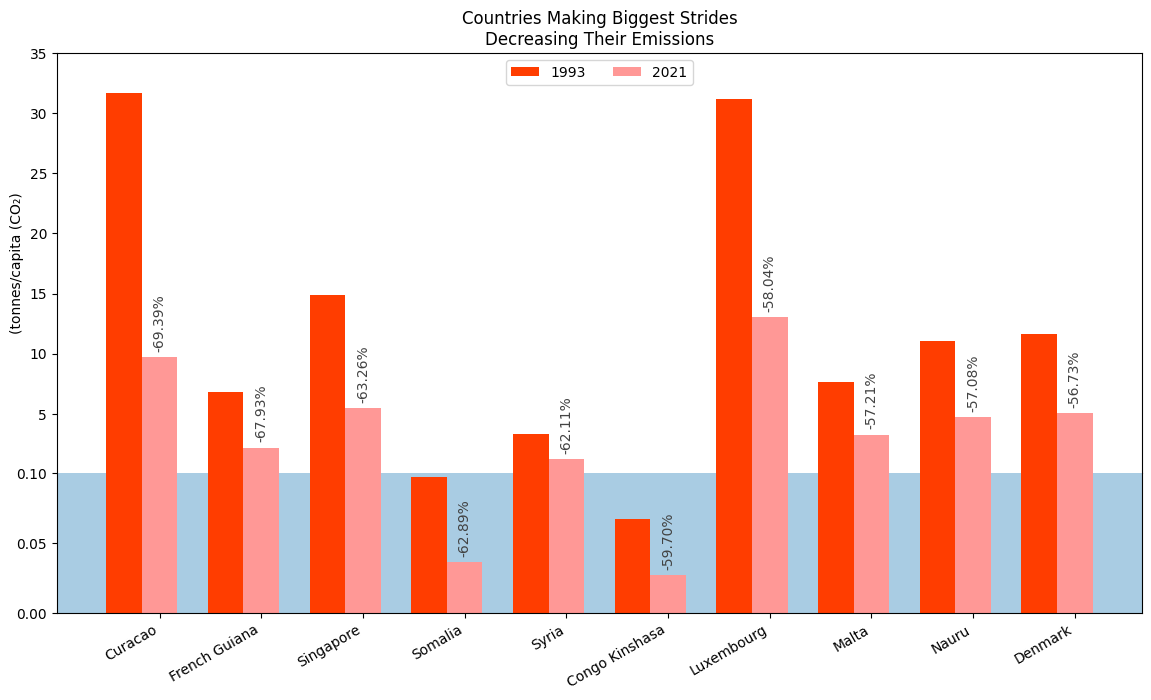

In [ ]:
#Creating horizontal bar chart with side-by-side bars

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#Create one Fig with two ax's (the Worst Ax1 above)&(the Best Ax1 below). Sharing same X data.
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(14,7), sharex=True,gridspec_kw={'height_ratios':[3,1]})
fig.subplots_adjust(hspace=0.00)  # adjust space between axes
# Creating a variable to supply X Axis Labels.
x_countries = reshape_biggest_strides.columns[1:]

x = np.arange(len(x_countries))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

# These are the colors that will be used in the plot
ax1.set_prop_cycle(color=['#FF3D00','#ff9896','#B39DDB','#c49c94','#c7c7c7', '#c49c94','#8c564b','#7f7f7f', '#c49c94','#8c564b','#ff9896','#c7c7c7'])
ax2.set_prop_cycle(color=['#FF3D00','#ff9896','#c49c94', '#c7c7c7','#c49c94','#8c564b','#c7c7c7',  '#c49c94','#8c564b','#7f7f7f', '#c49c94','#8c564b','#ff9896','#c7c7c7'])

# For loop to get plotpoints for each country
for column, row in reshape_biggest_strides.head(2).iterrows():
  year = (row['year'])
  x_countries = list(row[1:].keys())
  CO2 = list(row[1:].values)
  perc_dec = reshape_biggest_strides.loc[reshape_biggest_strides['year'] == '2021vs1993ch'].values[:,1:].tolist()[0]
  offset = width * multiplier
  rects = ax1.bar(x + offset, CO2, width, label=year)
  rects = ax2.bar(x + offset, CO2, width, label=year)
  if ( multiplier == 1):
    ax1.bar_label(rects, labels=perc_dec, rotation=90, padding=4, color='#424242')
    ax2.bar_label(rects, labels=perc_dec, rotation=90, padding=4, color='#424242')
  multiplier += 1 # shift bar over 1 to the right to plot the next country.

ax1.set_ylabel('(tonnes/capita (CO₂)')

fig.subplots_adjust(top=0.91)#Adjust space between fig and title.

ax1.set_title('Countries Making Biggest Strides\nDecreasing Their Emissions')

ax1.set_xticks(x + width, x_countries)#, rotation=55)
ax2.set_xticks(x + width, x_countries ,rotation=30, ha='right' )

ax1.legend(loc='upper center', ncols=10)
ax2.set_ylim(bottom=0, top=0.1)
ax1.set_ylim(bottom=0.1, top=35)

ax1.set_facecolor('white')#Custom background color for remaining graph data.
ax2.set_facecolor('#A9CCE3')#Custom background color for enlarged small emitters data.

# The spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.set_yticks([0,0.05,0.1])

plt.show()



---


# CONCLUSION

---




These countries are making the biggest strides which is a win for the planet. However, these striders are split between active and passive reduction. Unfortunately, some of these countries have fallen victim to poverty or war leading to lower emissions as a result to these circumstances. In contrary countries like, Denmark, Singapore, Luxembourg, Malta, and Curacao are continuously making effort into decreasing Co2 by advancing their adoption of renewable energy sources.





---


# SOURCES

---





```
  # BIGGEST STRIDES SOURCE

  CO2_DATA
    Sourced from OWID: https://github.com/owid/co2-data/blob/master/README.md on okt 2023 for this report.
    Used: co2_per_capita

```





---


# REFERENCES

---





```
  Timespan reasoning 1993 - 2021

  In 1990, the First IPCC Assessment Report (FAR) underlined the importance
  of climate change as a challenge with global consequences and requiring
  international cooperation. It played a decisive role in the creation of the UNFCCC,
  the key international treaty to reduce global warming and cope with the
  consequences of climate change. From: https://www.ipcc.ch/about/history/*

  1990:  
  would have been the preferred starting point. However, 1993
  showed more available data thus used as the start point
  for global awareness in this report.

  2021:
  latest available data.
```



Percentage of change:

`recent_amount - past_amount = new_amount / past_amount = the_amount * 100 = percentage_of_change`

          Example:
          A From 1993 (20) --> 2021(60) increase 📈
            60 -20 = 40/20 = 2 *100 =200% increase

          B From 1993 (90) --> 2021(50) decrease 📉
            50 -90 = -40/90 =-0,444 * 100 = -44,4 decrease




green.png